In [1]:
import os

In [6]:
logs_dir = '../logs'
accuracy_sum = 0
training_loss_sum = 0
valid_loss_sum = 0
accuracy_sum_5 = 0
training_loss_sum_5 = 0
valid_loss_sum_5 = 0
total_logs = 0
iteration = 0
for filename in os.listdir(logs_dir):
    if filename == ".ipynb_checkpoints":
        continue
    with open(os.path.join(logs_dir, filename), "r") as f1:
        data_list = f1.readlines()[-1].split(",")
        accuracy = float(data_list[3])
        training_loss = float(data_list[1])
        valid_loss = float(data_list[2])
        print(f"{filename}: training_loss: {training_loss}, valid_loss: {valid_loss}, accuracy: {accuracy}")
        accuracy_sum += accuracy
        training_loss_sum += training_loss
        valid_loss_sum += valid_loss
        total_logs += 1
        
        if iteration <= 4:
            accuracy_sum_5 += accuracy
            training_loss_sum_5 += training_loss
            valid_loss_sum_5 += valid_loss
            if iteration == 4:
                print(f"over 5 iterations: training_loss: {training_loss_sum_5/5}, valid_loss: {valid_loss_sum_5/5}, accuracy: {accuracy_sum_5/5}")
                accuracy_sum_5 = 0
                training_loss_sum_5 = 0
                valid_loss_sum_5 = 0
                iteration = -1
        iteration += 1
            
print(f"\nFor {total_logs} models, \
    \nthe average training_loss: {training_loss_sum / total_logs}, \
    \nthe average valid_loss: {valid_loss_sum / total_logs}, \
    \nthe average accuracy: {accuracy_sum / total_logs}")

log2500_40000_0.csv: training_loss: 0.13946428894996643, valid_loss: 0.2696036994457245, accuracy: 0.8934000134468079
log2500_40000_1.csv: training_loss: 0.14270348846912384, valid_loss: 0.2665984034538269, accuracy: 0.8924000263214111
log2500_40000_2.csv: training_loss: 0.14653433859348297, valid_loss: 0.2666953504085541, accuracy: 0.8899999856948853
log2500_40000_3.csv: training_loss: 0.14384619891643524, valid_loss: 0.27243176102638245, accuracy: 0.8902000188827515
log2500_40000_4.csv: training_loss: 0.13936318457126617, valid_loss: 0.2849350571632385, accuracy: 0.8830000162124634
over 5 iterations: training_loss: 0.14238229990005494, valid_loss: 0.2720528542995453, accuracy: 0.8898000121116638
log2500_60000_0.csv: training_loss: 0.1397319734096527, valid_loss: 0.2780780792236328, accuracy: 0.885200023651123
log2500_60000_1.csv: training_loss: 0.14646582305431366, valid_loss: 0.27175185084342957, accuracy: 0.88919997215271
log2500_60000_2.csv: training_loss: 0.14476148784160614, val

In [2]:
import csv
import pandas as pd

In [3]:
data_dir = "../data/examples10_sentences"
# {"model_name": {1:<num of subs>, 2:...}}
models_subs = {}
# {models: {text: adverse}}
models_texts = {}
subs = 0

for filename in os.listdir(data_dir):
    if filename == ".ipynb_checkpoints":
        continue
    with open(os.path.join(data_dir, filename), "r") as f1:
        no_iter_filename = filename[:16]
        if (no_iter_filename[-1] == "_"):
            no_iter_filename = no_iter_filename[:-1]
        if not(no_iter_filename in models_subs):
            models_subs[no_iter_filename] = {}
            models_texts[no_iter_filename] = {}
        reader = csv.reader(f1)
        i = 0
        for row in reader:
            if (len(row[0]) > 5):
                if (i in models_subs[no_iter_filename]):
                    models_subs[no_iter_filename][i] += int(row[2])
                else:
                    models_subs[no_iter_filename][i] = int(row[2])
                models_texts[no_iter_filename][row[0]] = row[1]
                i += 1
            

In [4]:
for models in models_subs:
    for i in range(10):
        if (models == "model12500_80000" and (i == 9)):
            models_subs[models][i] = models_subs[models][i] / 4
        else:
            models_subs[models][i] = models_subs[models][i] / 5

In [32]:
df = pd.DataFrame.from_dict(models_subs)
df

,model10000_40000,model10000_60000,model10000_80000,model12500_40000,model12500_60000,model12500_80000,model2500_40000,model2500_60000,model2500_80000,model5000_40000,model5000_60000,model5000_80000,model7500_40000,model7500_60000,model7500_80000
0,3.0,3.4,2.8,2.4,2.4,2.00,2.2,1.8,2.4,2.8,2.8,3.0,1.6,1.6,1.8
1,4.8,5.4,5.4,4.2,4.4,4.40,3.4,4.2,3.8,4.8,4.0,3.8,4.6,4.0,4.0
2,3.8,3.8,3.6,4.0,5.4,4.20,2.2,2.8,2.6,3.8,4.2,3.8,3.0,2.6,2.8
3,7.0,6.8,6.6,5.2,5.0,4.40,8.6,9.0,9.4,8.8,8.8,9.2,7.4,8.4,8.0
4,9.2,9.8,8.8,8.0,8.6,8.60,5.4,6.0,6.2,8.2,8.6,9.0,8.2,9.0,8.6
5,10.6,10.2,11.6,10.4,10.8,11.40,10.8,8.0,10.0,8.0,7.6,8.0,7.6,8.4,9.0
6,6.0,5.4,6.6,6.4,7.4,8.60,5.6,5.4,5.2,7.6,5.0,5.4,6.4,5.6,5.6
7,6.0,6.0,7.4,4.8,7.2,6.20,6.2,5.8,6.0,6.2,7.6,7.2,8.6,9.8,9.2
8,17.0,17.0,17.8,19.2,21.2,15.40,14.2,12.2,15.2,15.8,15.4,17.2,19.6,18.2,18.0
9,9.0,8.6,8.2,7.4,7.6,5.75,9.0,9.6,10.0,8.6,8.4,8.0,8.0,8.0,7.6


In [33]:
df = df.rename(columns={"model10000_40000":"models45_49", "model10000_60000":"models50_54", "model10000_80000":"models55_59","model12500_40000":"models60_64","model12500_60000":"models65_69","model12500_80000":"models70_74","model2500_40000":"models00_04","model2500_60000":"models05_09","model2500_80000":"models10_14","model5000_40000":"models15_19","model5000_60000":"models20_24","model5000_80000":"models25_29","model7500_40000":"models30_34","model7500_60000":"models35_39","model7500_80000":"models40_44"})
df = df.reindex(sorted(df.columns), axis=1)

In [34]:
df

,models00_04,models05_09,models10_14,models15_19,models20_24,models25_29,models30_34,models35_39,models40_44,models45_49,models50_54,models55_59,models60_64,models65_69,models70_74
0,2.2,1.8,2.4,2.8,2.8,3.0,1.6,1.6,1.8,3.0,3.4,2.8,2.4,2.4,2.00
1,3.4,4.2,3.8,4.8,4.0,3.8,4.6,4.0,4.0,4.8,5.4,5.4,4.2,4.4,4.40
2,2.2,2.8,2.6,3.8,4.2,3.8,3.0,2.6,2.8,3.8,3.8,3.6,4.0,5.4,4.20
3,8.6,9.0,9.4,8.8,8.8,9.2,7.4,8.4,8.0,7.0,6.8,6.6,5.2,5.0,4.40
4,5.4,6.0,6.2,8.2,8.6,9.0,8.2,9.0,8.6,9.2,9.8,8.8,8.0,8.6,8.60
5,10.8,8.0,10.0,8.0,7.6,8.0,7.6,8.4,9.0,10.6,10.2,11.6,10.4,10.8,11.40
6,5.6,5.4,5.2,7.6,5.0,5.4,6.4,5.6,5.6,6.0,5.4,6.6,6.4,7.4,8.60
7,6.2,5.8,6.0,6.2,7.6,7.2,8.6,9.8,9.2,6.0,6.0,7.4,4.8,7.2,6.20
8,14.2,12.2,15.2,15.8,15.4,17.2,19.6,18.2,18.0,17.0,17.0,17.8,19.2,21.2,15.40
9,9.0,9.6,10.0,8.6,8.4,8.0,8.0,8.0,7.6,9.0,8.6,8.2,7.4,7.6,5.75


In [29]:
import matplotlib.pyplot as plt

In [30]:
plt.rcParams['font.size'] = 8.2

<Axes: xlabel='Sentences', ylabel='Average Substitutions'>

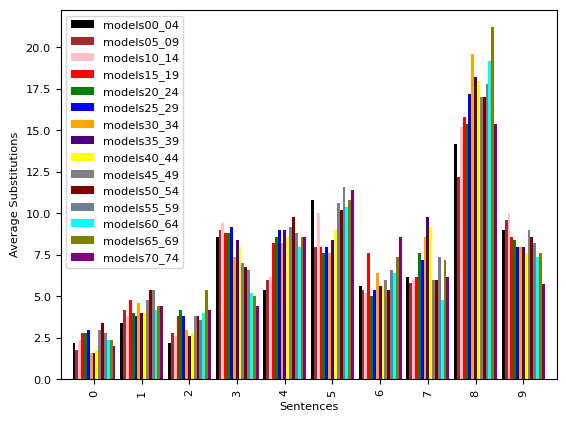

In [37]:
bar = df.plot.bar(width = .9, color=['black', 'brown', 'pink', 'red', 'green', 'blue', 'orange', 'indigo', 'yellow', 'gray', 'maroon', 'slategrey','cyan', 'olive', 'purple'])
plt.ylabel("Average Substitutions")
plt.xlabel("Sentences")
bar

In [20]:
models_texts

{'model10000_40000': {'Sean Astin pulls off another amazing performance in "Toy Soldiers". He plays the highly intelligent prankster, Billy Tepper along with Wil Wheaton and Keith Coogan who play his best friends, Joey Trotta and Jonathan "Snuffy" Bradberry. During a regular day at Saint Anselm\'s school for boys, a group of dangerous terrorists take all the boys and teachers as hostages and threatens to blow up the school if the leader, Luis Cali (Andrew Divoff\'s), father isn\'t released from the American prison, but these aren\'t just ordinary boys that are taken hostage, most of these kids are the sons of very powerful people in America and half of them were expelled from other schools before they came to Saint Anselm\'s. They\'re mouths and actions just may get them killed. When the government is desperately trying to figure out a way to help, Billy, Joey, Snuffy and some more boys decide to take matters into their own hands.': 'Sean Astin pulls off another awful performance in " 

In [44]:
d = models_texts["model12500_60000"]
d

{'Sean Astin pulls off another amazing performance in "Toy Soldiers". He plays the highly intelligent prankster, Billy Tepper along with Wil Wheaton and Keith Coogan who play his best friends, Joey Trotta and Jonathan "Snuffy" Bradberry. During a regular day at Saint Anselm\'s school for boys, a group of dangerous terrorists take all the boys and teachers as hostages and threatens to blow up the school if the leader, Luis Cali (Andrew Divoff\'s), father isn\'t released from the American prison, but these aren\'t just ordinary boys that are taken hostage, most of these kids are the sons of very powerful people in America and half of them were expelled from other schools before they came to Saint Anselm\'s. They\'re mouths and actions just may get them killed. When the government is desperately trying to figure out a way to help, Billy, Joey, Snuffy and some more boys decide to take matters into their own hands.': 'Sean Astin extract off another awful performance in " Toy Soldiers " . He

In [49]:
d['i believe that this movie was a terrible waste of my time, and i would know after watching it 5 times in class. this movie does not show what absolutely perfectly happened during these times. no one can truly say that these things happened to the letter. if anything the only good part would be the actors, even tho that they were really really crap.they were reading the script without expression. quite boring. i would rather watch play school. so i would definitely like to never ever see this movie again in my whole life. it is a complete waste of time unless you want your time to be wasted and if you would like to see an unrealistic view of what happened back in 1981.']

'i believe that this motion-picture_show was amp frightening waste_material of my time , and i would know after watching it 5 times in class . this movie does not show what absolutely perfectly happened during these times . no one can truly say that these things happened to the letter . if anything the only good part would be the actors , even tho that they were really really crap.they were reading the script without expression . quite ho-hum . i would rather watch play school . so i would definitely like to never ever see this movie again in my whole life . it is a complete waste_material of time unless you want your time to be wasted and if you would like to see an unrealistic view of what happened back in 1981 .'